In [305]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as st

In [315]:
download_data = yf.download("ICICIBANK.NS", period="2y")
data = pd.DataFrame(download_data['Close'])
# data

[*********************100%%**********************]  1 of 1 completed


In [316]:
data['mean'] = np.mean(data['Close'])
data['std'] = np.std(data['Close'])

data['rolling_mean'] = data['Close'].rolling(45).mean()
data['rolling_std'] = data['Close'].rolling(45).std()
data['2UP'] = data['rolling_mean'] + data['std']
data['2DOWN'] = data['rolling_mean'] - data['std']

data['daily_return'] = data['Close'].pct_change()
data['month_return'] = data['Close'].resample('M').ffill().pct_change()
# resample('M').ffill().pct_change()
# data.head(50)

In [317]:
# data['mean'] = np.mean(data['Close'])
# data['std'] = np.std(data['Close'])

# data['rolling_mean'] = data['Close'].rolling(45).mean()
# data['rolling_std'] = data['Close'].rolling(45).std()
# data['2UP'] = data['rolling_mean'] + data['rolling_std']
# data['2DOWN'] = data['rolling_mean'] - data['rolling_std']

# data['daily_return'] = data['Close'].pct_change()
# data['month_return'] = data['Close'].resample('M').ffill().pct_change()
# resample('M').ffill().pct_change()
# data.head(50)

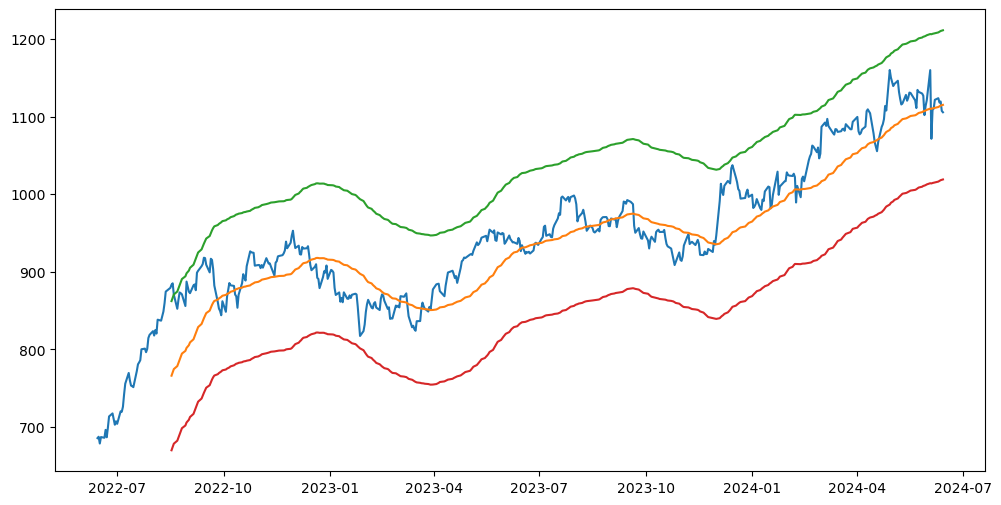

In [318]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.plot(data['rolling_mean'])
plt.plot(data['2UP'])
plt.plot(data['2DOWN']);

In [319]:
monthly_data = data['Close'].resample('W', label='left').ffill().pct_change()*100
# monthly_data

In [320]:
np.mean(monthly_data), np.std(monthly_data)

(0.4859309709876325, 2.339491169835166)

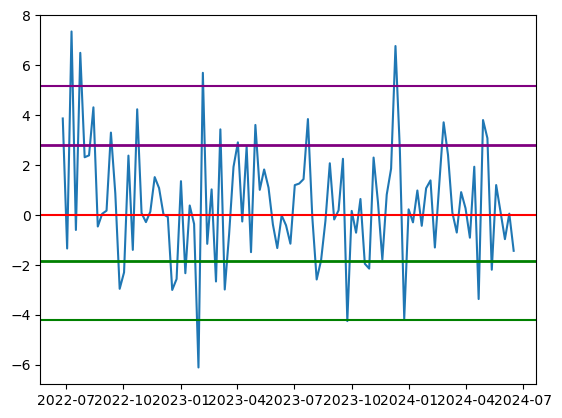

In [321]:
plt.plot(monthly_data)
plt.axhline(0, color = 'red')
plt.axhline(np.mean(monthly_data) + np.std(monthly_data), color='purple', linewidth=2);
plt.axhline(np.mean(monthly_data) - np.std(monthly_data), color='green', linewidth=2);
plt.axhline(np.mean(monthly_data) + 2* np.std(monthly_data), color='purple');
plt.axhline(np.mean(monthly_data) - 2*np.std(monthly_data), color='green');

In [322]:
np.mean(data['daily_return']), np.std(data['daily_return'])


(0.0010383435189113511, 0.011670063690464007)

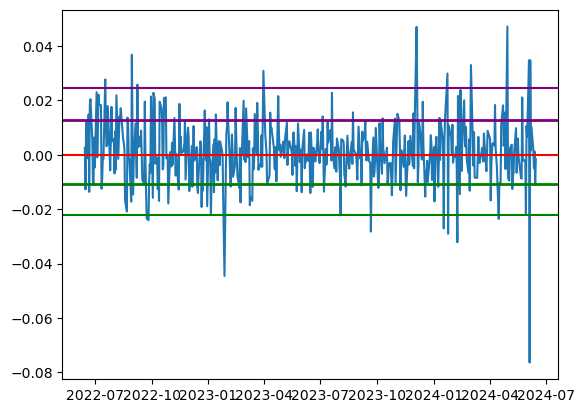

In [323]:
plt.plot(data['daily_return'])
plt.axhline(0, color = 'red')
plt.axhline(np.mean(data['daily_return']) + np.std(data['daily_return']), color='purple', linewidth=2);
plt.axhline(np.mean(data['daily_return']) - np.std(data['daily_return']), color='green', linewidth=2);
plt.axhline(np.mean(data['daily_return']) + 2* np.std(data['daily_return']), color='purple');
plt.axhline(np.mean(data['daily_return']) - 2*np.std(data['daily_return']), color='green');

In [324]:
y = np.array(data['Close'])
X= pd.to_datetime(data['Close'].index).map(dt.datetime.toordinal)
X = np.array(X)


In [325]:
# y = mdates.date2num(X.index)
# data_set['X'] = pd.to_datetime(y.index).map(dt.datetime.toordinal)

In [326]:
y.shape, X.shape

((494,), (494,))

In [327]:
intercept, slope = np.polynomial.polynomial.polyfit(X, y, deg =1)
intercept, slope

(-296940.52037656563, 0.40325842125449246)

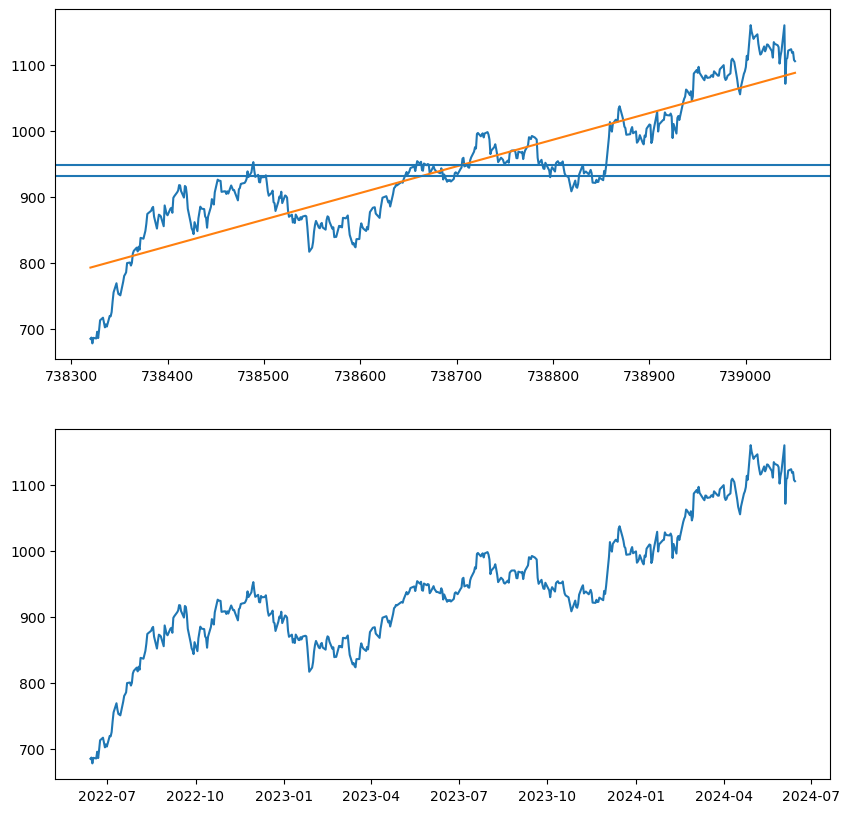

In [332]:
fig, ax = plt.subplots(figsize = (10, 10), nrows=2, ncols = 1)
ax[0].plot(X,y)
ax[0].plot(X, slope*X+intercept)
ax[1].plot(data['Close'])
ax[0].axhline(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))[0])
ax[0].axhline(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))[1])

In [330]:
a = data['Close']
st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(931.125515058208, 948.1471593787859)

In [331]:
np.std(a)/len(a), np.mean(a)

(0.19469393990551095, 939.6363372184969)